# MoSDeF: A Molecular Simulation and Design Framework

The Molecular Simulation and Design Framework (MoSDeF) is a collection of open-source tools ([hosted on Github](https://github.com/mosdef-hub)) aimed at facilitating the construction and simulation of complex molecular systems - with a particular focus on the automated screening of large structural parameter spaces. All tools are written as Python packages and feature a Python-based API.

## Basic mBuild tutorial

The first of the MoSDeF tools we will explore is the [mBuild package](http://mosdef-hub.github.io/mbuild/), which utilizes a hierarchical, component-based approach to molecule construction, allowing complex systems to be built using a subset of re-usable parts, just like Legos! In this tutorial we will explore some of mBuild's basic functionality by constructing a linear alkane chain. We'll then examine how mBuild's component-based design approach allows components to be easily swapped to facilitate structural screening.

### Hierarchical design approach

mBuild uses a [composite design pattern](https://en.wikipedia.org/wiki/Composite_pattern) to approach the creation of complex molecular systems. This yields the following features:
* Molecules feature a tree-like hierarchy (as shown in the figure below)
* All components in the hierarchy feature a common data structure (an mBuild `Compound`)
* The lowest level of the hierarchy (the 'leaves') are referred to as `Particles` and are typically individual atoms
* Atomic positions are maintained only at the `Particle` level; higher level components can compute properties based on contained `Particles`

Below is an example of an mBuild molecule hierarchy for an alkylsilane monolayer attached to a crystalline silica surface.
<img src="hierarchical_design_image.png" alt="Drawing" style="width: 700px;"/>

### Primer on using Jupyter notebooks

[Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/) provide an interactive environment for "developing, documenting, and executing code". Several languages are supported; however here we will be using Python. 

Jupyter notebooks feature two primary types of cells:
1. Markdown cells, like this cell, which contain explanatory text
2. Code cells, that can be executed by either clicking on the "run cell" icon or by hitting SHIFT + ENTER.

Cells do not have to be executed in order (however the cells in this tutorial are designed to be executed sequentially), and the order in which cells have been executed is recorded by the bracketed number to the left of the code cell (e.g. [ 1 ]). When a cell is executed you will first see an asterisk (i.e. [ * ]) which means that the cell is still running. When the asterisk is replaced by a number this means the execution has completed.

### Importing mBuild

To begin using mBuild we need to import the mBuild package, which is available through both the [Anaconda](https://anaconda.org/mosdef/mbuild) and [pip](https://pypi.python.org/pypi/mbuild/0.7.2) package managers. mBuild can also be downloaded from source, which is hosted on [Github](https://github.com/mosdef-hub/mbuild).

Here, we'll import the mBuild package along with a `visualize` routine that will allow us to view our molecules along the way. The `%matplotlib notebook` routine is a Jupyter 'magic' command that allows us to interactively view matplotlib figures within a notebook.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

### The `Compound` class

The base class of mBuild is the `Compound` class, which defines the primary building block used for constructing molecules. Molecules are constructed hierarchically; however, each level of the hierarchy inherits from the `Compound` class. This means that `Compounds` may contain other `Compounds`, and that the same methods and attributes are present for molecule components at any level of the hierarchy.

In [2]:
my_compound = mb.Compound()
type(my_compound)

mbuild.compound.Compound

mBuild `Compounds` feature [a variety of useful methods and attributes](http://mosdef-hub.github.io/mbuild/data_structures.html) to facilitate system construction.

In [3]:
dir(my_compound)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_intermol_molecule_type',
 '_charge',
 '_check_if_contains_rigid_bodies',
 '_clone',
 '_clone_bonds',
 '_contains_only_ports',
 '_contains_rigid',
 '_increment_rigid_ids',
 '_kick',
 '_n_particles',
 '_particles',
 '_periodicity',
 '_pos',
 '_remove_references',
 '_reorder_rigid_ids',
 '_rigid_id',
 '_to_topology',
 '_update_port_locations',
 'add',
 'add_bond',
 'all_ports',
 'ancestors',
 'available_ports',
 'bond_graph',
 'bonds',
 'boundingbox',
 'center',
 'charge',
 'children',
 'contains_rigid',
 'energy_minimization',
 'from_parmed',
 'from_trajectory',
 'generate_bonds',
 'label_rigid_bodies',
 'labels',
 'max_rig

### Creating `Compounds`

There are several ways that `Compounds` can be created with mBuild. The simplest is to construct them from `Particles`. The `Particle` class is used to define `Compounds` residing at the lowest level of the containment hierarchy. Standard mBuild protocol is to define `Particle` names according to their elemental symbol (e.g. `'C'`), or to preface `Particle` names by an underscore for coarse-grained beads (e.g. `'_CH4'`). This aids in the atomtyping and forcefield application process (using the Foyer package) which we will get back to later.

Now, lets create a simple carbon `Particle`. [Several arguments are available](http://mosdef-hub.github.io/mbuild/data_structures.html#mbuild.compound.Compound) to set various `Compound`/`Particle` attributes upon instantiation. Here, we'll use the `name` argument to specify the element of our `Particle` and the `pos` argument to specify the location of the `Particle` in Cartesian space.

**Note:** mBuild expects all distance units to be in nanometers.

In [4]:
carbon = mb.Particle(name='C', pos=[1.0, 2.0, 3.0])
carbon

<C pos=( 1.0000, 2.0000, 3.0000), 0 bonds, id: 4537648912>

Individual atoms are boring. Let's try now to create a simple CH2 moiety. (Don't worry about the undercoordinated carbon; we'll be using this later to piece together an alkane chain.)

The first step we need to take is to create an empty mBuild `Compound` to add our `Particles` to (we can give this `Compound` a name if we'd like).

In [5]:
ch2 = mb.Compound()
ch2 = mb.Compound(name='CH2')

Now we need to create three `Particles`: one carbon and two hydrogens. We'll manually set the atomic positions such that they represent realistic atomic spacings.

In [6]:
carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
hydrogen = mb.Particle(pos=[0.109, 0.0, 0.0], name='H')
hydrogen2 = mb.Particle(pos=[-0.109, 0.0, 0.0], name='H')

As described earlier, the hierarchical design approach used by mBuild allows `Compounds` to contain other `Compounds`. To add our three `Particles` to the hierarchy of our CH2 `Compound` we can use the `add` function. All we need to provide are the variable references to these three particles in a list-like format.

In [7]:
ch2.add([carbon, hydrogen, hydrogen2])

We can use the `particles` method to view the `Particles` contained by a `Compound`. This method is written as a generator to conserve memory for large systems, so we'll need to convert to a `list`.

In [8]:
list(ch2.particles())

[<C pos=( 0.0000, 0.0000, 0.0000), 0 bonds, id: 4537650256>,
 <H pos=( 0.1090, 0.0000, 0.0000), 0 bonds, id: 4537650200>,
 <H pos=(-0.1090, 0.0000, 0.0000), 0 bonds, id: 4537650368>]

As we can see, our carbon `Particle` and two hydrogen `Particles` are now contained within our CH2 `Compound`. Now let's visualize our `Compound` to confirm we built this correctly.

**Note:** For the purposes of this tutorial we are using a local `visualize` routine that utilizes `matplotlib` to view our molecules. mBuild also contains a `Compound.visualize()` routine that uses the `NGLview` package for molecule visualization; however, this routine is currently under construction.

<IPython.core.display.Javascript object>


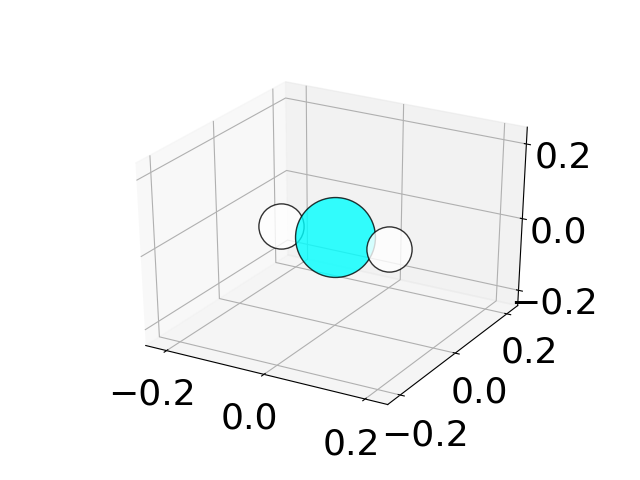

In [9]:
visualize(ch2)

Looking good! However, although we've added our three `Particles` to the CH2 `Compound`, we have yet to define any bonds between them. To accomplish this, we can use the `Compound.add_bond()` method to specify our two C-H bonds.

<IPython.core.display.Javascript object>


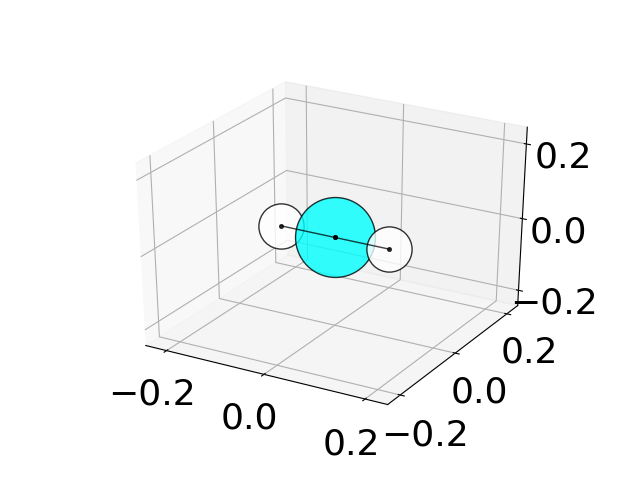

In [10]:
ch2.add_bond((carbon, hydrogen))
ch2.add_bond((carbon, hydrogen2))
visualize(ch2)

Visually we now see that our CH2 `Compuound` contains three `Particles` and two C-H bonds. We can also use the `Compound.bonds()` method to confirm that our bonds were added correctly.

In [11]:
list(ch2.bonds())

[(<H pos=( 0.1090, 0.0000, 0.0000), 0 bonds, id: 4537650200>,
  <C pos=( 0.0000, 0.0000, 0.0000), 0 bonds, id: 4537650256>),
 (<C pos=( 0.0000, 0.0000, 0.0000), 0 bonds, id: 4537650256>,
  <H pos=(-0.1090, 0.0000, 0.0000), 0 bonds, id: 4537650368>)]

### Reusing components

It would be quite tedious to have to go through each of the above steps every time we wanted to create a new CH2 `Compound`. However, this problem is easily solved by wrapping these routines together into a class.

Here, we'll create a class for our CH2 moiety using the same approach we just took above so that we can easily reuse this piece when constructing more complex molecules.

In [12]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        carbon = mb.Particle(pos=[0.0, 0.0, 0.0], name='C')
        hydrogen = mb.Particle(pos=[0.109, 0.0, 0.0], name='H')
        hydrogen2 = mb.Particle(pos=[-0.109, 0.0, 0.0], name='H')
        self.add([carbon, hydrogen, hydrogen2])
        self.add_bond((carbon, hydrogen))
        self.add_bond((carbon, hydrogen2))

As we can see, our class definition contains the same commands we just used to the create the CH2 `Compound` above; however, we have replaced `ch2` with `self` so that these commands will be performed on any instance of our `CH2` class. Additionally, since we want our class instance to be an mBuild `Compound`, we specify that our `CH2` class should inherit from `mb.Compound`.

Now lets try instantiating our class.

<IPython.core.display.Javascript object>


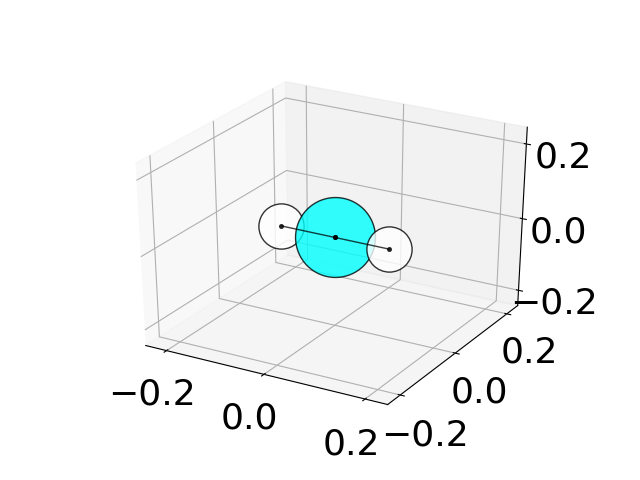

In [13]:
ch2 = CH2()
ch2.name = 'myCH2'
ch2.name
visualize(ch2)

While there are instances where creating `Compounds` particle-by-particle is useful, this process can get a bit tedious. It's much easier to create them by loading in pre-assembled building blocks. These can easily be created using software such as [Avogadro](https://avogadro.cc/). The `load()` function can create mBuild `Compounds` from a variety of common file formats (e.g. PDB, MOL2). Here, we'll create the same CH2 `Compound` by loading from a PDB file.

<IPython.core.display.Javascript object>


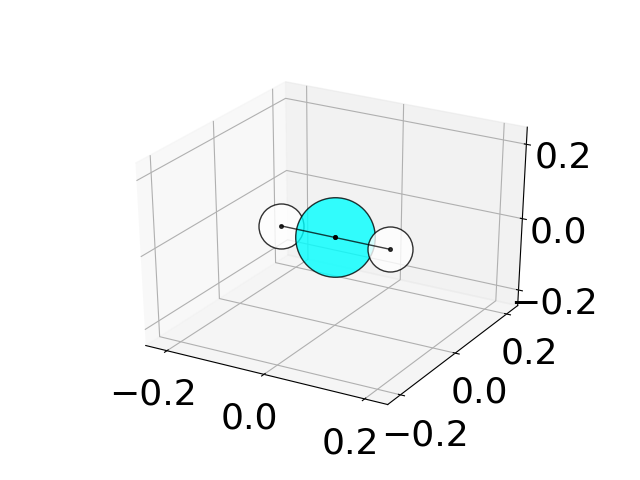

In [14]:
ch2 = mb.load('ch2.pdb')
visualize(ch2)

We can also wrap this into a class if we want.

<IPython.core.display.Javascript object>


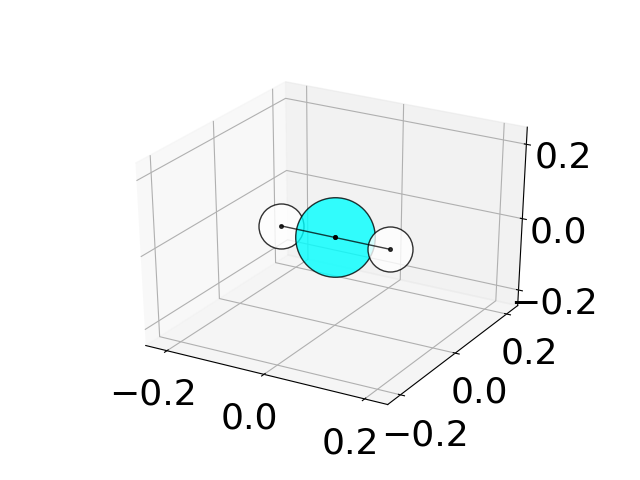

In [15]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        
ch2 = CH2()
visualize(ch2)

### Connecting components

We've already found that `Particles` can be connected (i.e. bonded) by using the `add_bond` routine; however, this does not actually move the atoms in space, and it would become burdensome to need to manually update the position of each atom. This is where [mBuild's `Port` class](http://mosdef-hub.github.io/mbuild/data_structures.html#mbuild.port.Port) comes into play. `Ports` in the most general sense define a location in space; however, in most cases these can be thought of as dangling bonds.

Let's test this functionality by adding a `Port` to the carbon atom of CH2. First, we'll instantiate our CH2 class and use the `particles_by_name` method to locate the carbon `Particle` within the `Compound`.

In [16]:
ch2 = CH2()
carbon = list(ch2.particles_by_name('C'))[0]
carbon

<C pos=( 0.0000, 0.0000, 0.0000), 0 bonds, id: 4594521256>

Now we'll instantiate the `Port` class. We can attach the `Port` to the carbon atom by using the `anchor` attribute. This allows mBuild to know which atoms to create bonds between when two `Ports` are connected. We can also provide an `orientation` vector to give our `Port` a desired direction, and can use the `separation` argument to shift our `Port` from the position of the anchor `Particle`. Since we're going to be connecting to another CH2 when building an alkane, we will shift our `Port` roughly half of a C-C bond length.

In [17]:
port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
type(port)

mbuild.port.Port

We now need to add this `Port` to the containment hierarchy of our CH2 molecule, again using the `add` method. We can also provide a descriptive label for our `Port` that we can use for easy access.

In [18]:
ch2.add(port, label='up')
ch2['up']

<Port 0 particles, non-periodic, 0 bonds, id: 4594521704>

If we visualize we'll now see that our CH2 molecule features a `Port` oriented in the positive z direction.

<IPython.core.display.Javascript object>


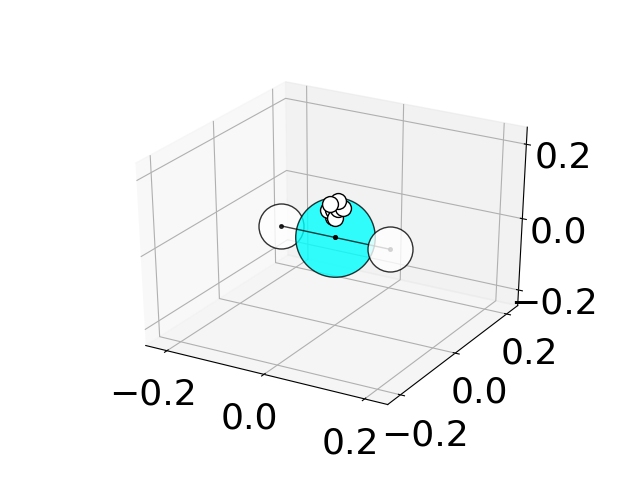

In [19]:
visualize(ch2)

Now we'll explore how `Ports` can be used to connect `Compounds` by connecting two CH2 groups to create a C2H4 group. We'll first use mBuild's `clone` function to create two deep copies of our CH2 `Compound`.

In [20]:
ch2_copy1 = mb.clone(ch2)
ch2_copy2 = mb.clone(ch2)

The `force_overlap` function can be used to force the overlap of two `Ports` by performing a coordinate transform on one of the two `Compounds` that should be connected. This will also create a bond between the anchor `Particles` of each `Port`. We'll use this function here to connect our two CH2 groups. We'll also add both of these CH2 groups to a parent C2H4 `Compound`.

<IPython.core.display.Javascript object>


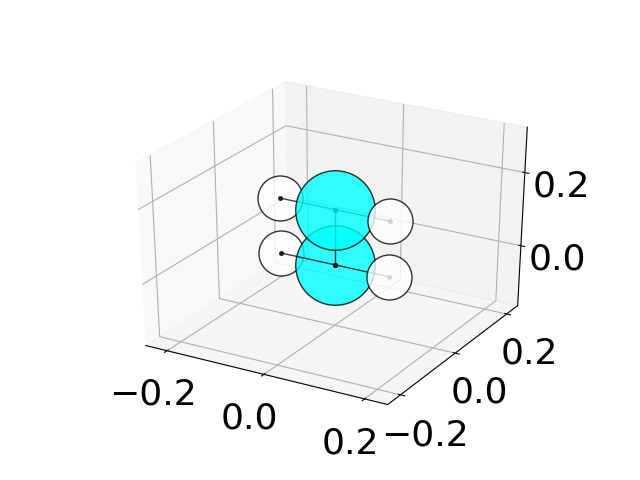

In [21]:
mb.force_overlap(move_this=ch2_copy1,
                 from_positions=ch2_copy1['up'],
                 to_positions=ch2_copy2['up'])
c2h4 = mb.Compound()
c2h4.add((ch2_copy1, ch2_copy2))
visualize(c2h4)

### Building a linear alkane

Now that we've explored the basics of creating mBuild `Compounds` and connecting them together, we'll use this approach to create a slightly more complex molecule, a linear butane.

First, we'll update our CH2 class definition to add two ports, oriented in +z and -z.

In [22]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')

<IPython.core.display.Javascript object>


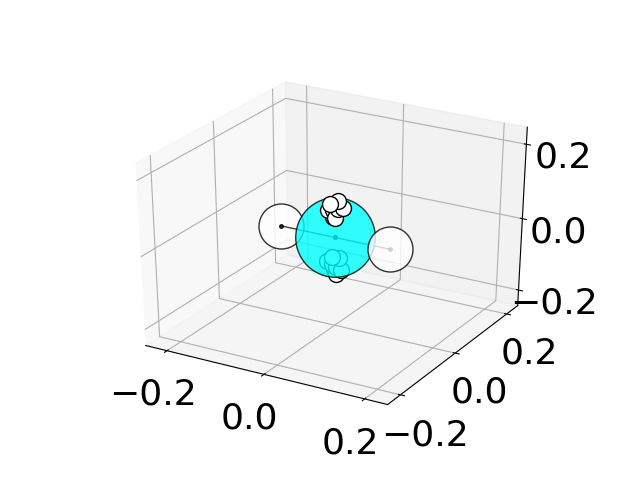

In [23]:
ch2 = CH2()
visualize(ch2)

We could approach our butane construction by connecting two CH2 moieties and two CH3 moieties. Alternatively, we could connect four CH2 moieties and cap the ends of the chain with hydrogen atoms. We'll go ahead and take the latter approach. As such, we'll need to also define a class for a hydrogen atom featuring a single port.

In [24]:
class Hydrogen(mb.Compound):
    def __init__(self):
        super(Hydrogen, self).__init__()
        
        self.add(mb.Particle(name='H'))
        up_port = mb.Port(anchor=self[0], orientation=[0, 0, 1], separation=0.075)
        self.add(up_port, 'up')

<IPython.core.display.Javascript object>


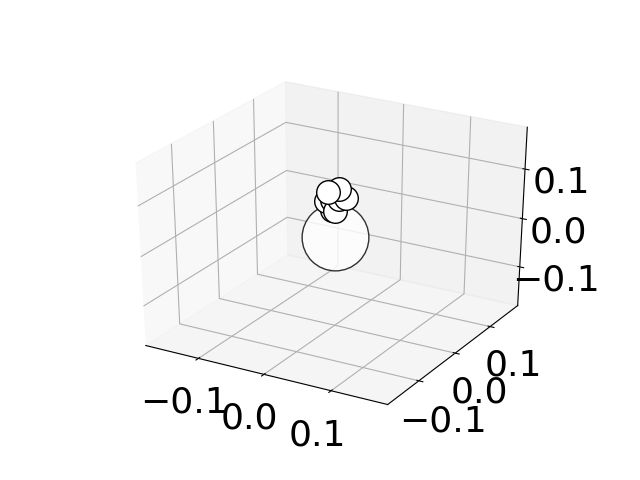

In [25]:
hydrogen = Hydrogen()
visualize(hydrogen)

We now have all of the pieces necessary to create a butane molecule. To begin, we'll instantiate an empty mBuild `Compound` to add our pieces to.

In [26]:
butane = mb.Compound()

Now, we'll create one of our CH3 ends by connecting a CH2 group and a hydrogen atom. We'll then add these two `Compounds` to our butane, giving them each a label. Note that by providing `ch2[$]` as the label for our CH2 group, mBuild will create a list that any subsequent parts added to the `Compound` with the same label prefix will be appended to.

<IPython.core.display.Javascript object>


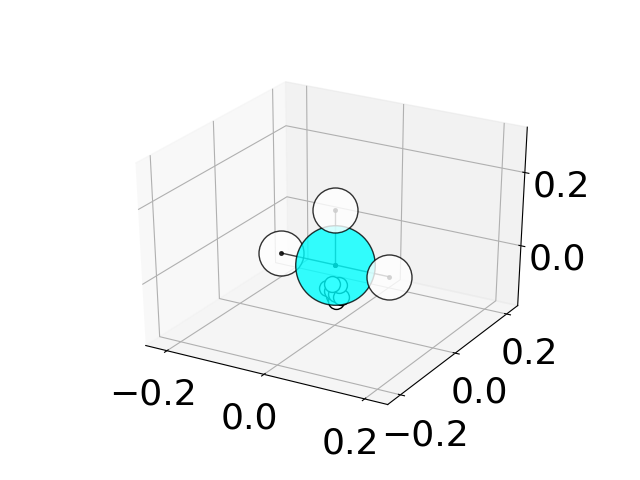

In [27]:
hydrogen = Hydrogen()
last_unit = CH2()
mb.force_overlap(move_this=hydrogen,
                 from_positions=hydrogen['up'],
                 to_positions=last_unit['up'])
butane.add(last_unit, label='ch2[$]')
butane.add(hydrogen, label='up-cap')
visualize(butane)

To continue to create our butane molecule, we'll next attach three CH2 groups to the CH3 cap we've just created. This can be set up in a loop, where we'll use `force_overlap` to iteratively attach each new CH2 instantiation to the last unit on the chain.

<IPython.core.display.Javascript object>


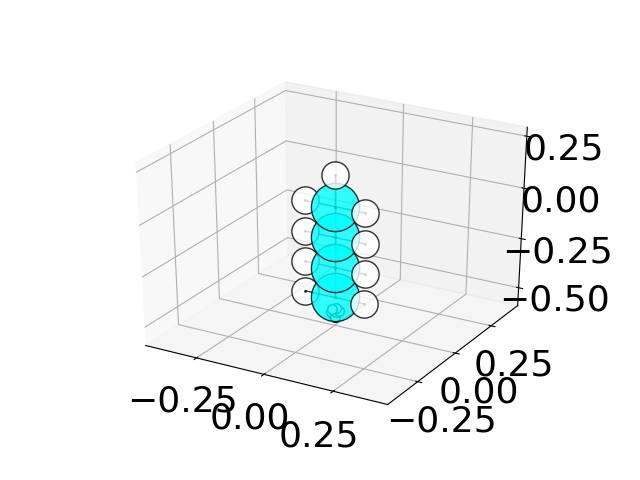

In [28]:
for _ in range(3):
    current_unit = CH2()
    mb.force_overlap(move_this=current_unit,
                     from_positions=current_unit['up'],
                     to_positions=last_unit['down'])
    butane.add(current_unit, label='ch2[$]')
    last_unit=current_unit

visualize(butane)

Finally, we need to cap the end of our molecule with a hydrogen atom to complete the creation of butane.

<IPython.core.display.Javascript object>


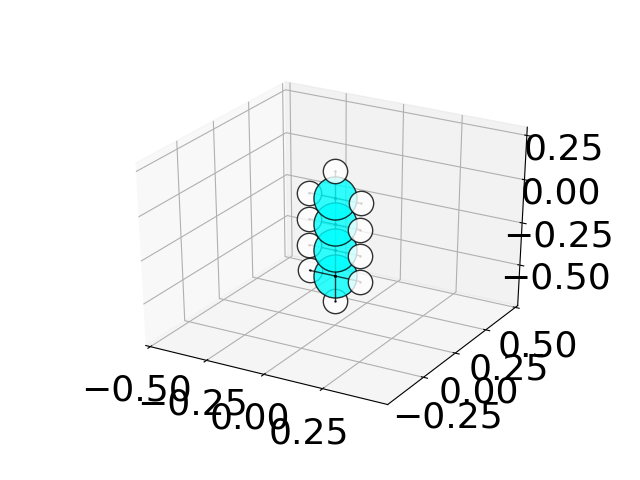

In [29]:
hydrogen2 = Hydrogen()
mb.force_overlap(move_this=hydrogen2,
                 from_positions=hydrogen2['up'],
                 to_positions=last_unit['down'])
butane.add(hydrogen2, label='down-cap')
visualize(butane)

As shown previously, we can also wrap all of these commands into a class.

In [30]:
class Butane(mb.Compound):
    def __init__(self):
        super(Butane, self).__init__()
        
        hydrogen = Hydrogen()
        last_unit = CH2()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['up'])
        self.add(last_unit, label='ch2[$]')
        self.add(hydrogen, label='up-cap')
        for _ in range(3):
            current_unit = CH2()
            mb.force_overlap(move_this=current_unit,
                             from_positions=current_unit['up'],
                             to_positions=last_unit['down'])
            self.add(current_unit, label='ch2[$]')
            last_unit=current_unit
        hydrogen = Hydrogen()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['down'])
        self.add(hydrogen, label='down-cap')

<IPython.core.display.Javascript object>


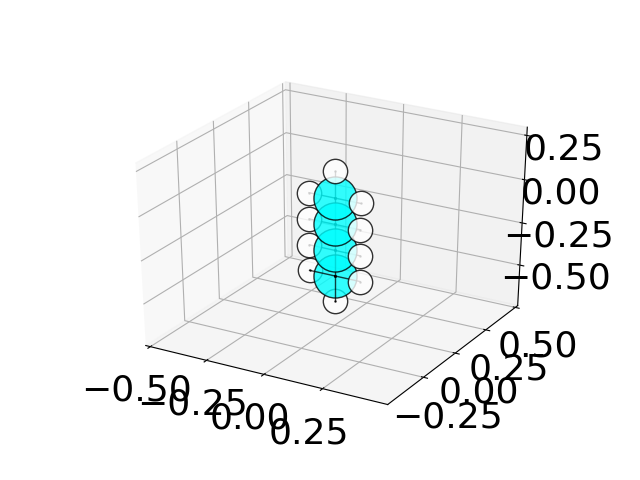

In [31]:
butane = Butane()
visualize(butane)

### Creating flexible classes

If we had to create a new class for each molecule we wanted to examine this would still be quite cumbersome if we wanted to screen over a large structural parameter space. However, since each `Compound` is defined as a Python class, one simply needs to define one or more top-level variables as arguments so that a single class definition could be used to create a whole family of molecules. We'll demonstrate that here by modifying the Butane class we've just defined to allow the creation of any linear alkane by adding a `chain_length` argument.

In [32]:
class Alkane(mb.Compound):
    def __init__(self, chain_length):
        super(Alkane, self).__init__()
        
        hydrogen = Hydrogen()
        last_unit = CH2()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['up'])
        self.add(last_unit, label='ch2[$]')
        self.add(hydrogen, label='up-cap')
        for _ in range(chain_length - 1):
            current_unit = CH2()
            mb.force_overlap(move_this=current_unit,
                             from_positions=current_unit['up'],
                             to_positions=last_unit['down'])
            self.add(current_unit, label='ch2[$]')
            last_unit=current_unit
        hydrogen = Hydrogen()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['down'])
        self.add(hydrogen, label='down-cap')

We can now create any linear alkane by simply providing a different value for `chain_length` upon instantiation.

<IPython.core.display.Javascript object>


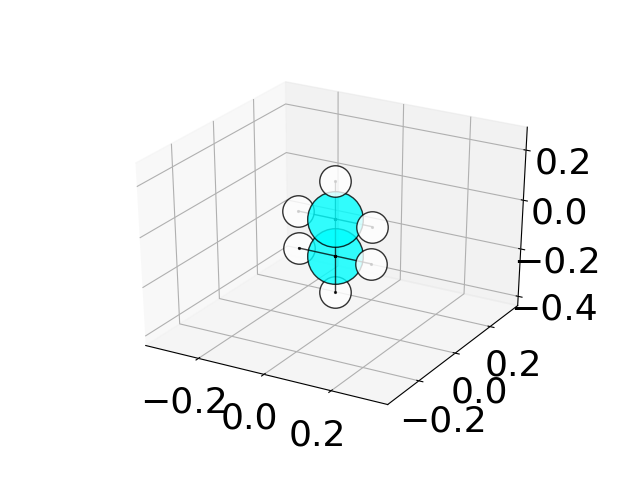

In [33]:
ethane = Alkane(chain_length=2)
visualize(ethane)

<IPython.core.display.Javascript object>


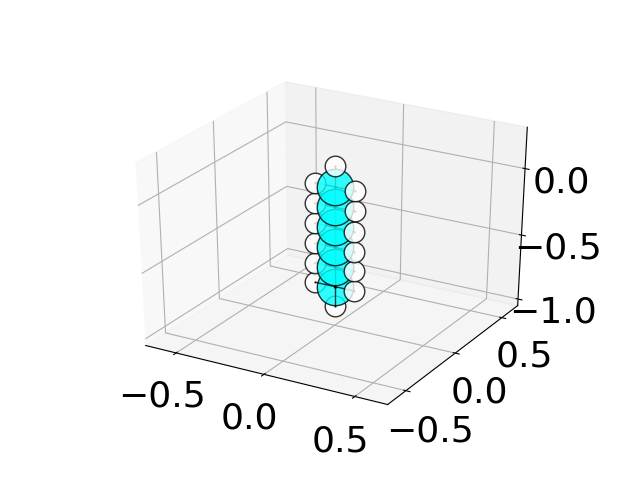

In [34]:
hexane = Alkane(chain_length=6)
visualize(hexane)

And those are the basics of mBuild! By defining flexible `Compound` classes with several top-level variables, a pool of `Compounds` spanning a large structural parameter space can be created by simply nesting several `for` loops.

<IPython.core.display.Javascript object>


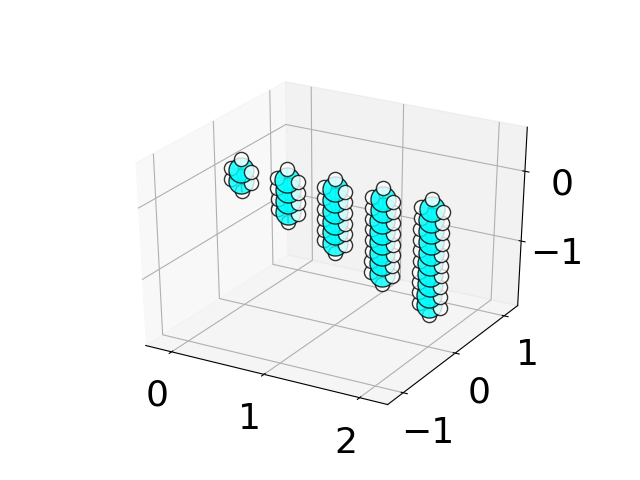

In [35]:
alkanes = mb.Compound()
for chain_length in range(2, 11, 2):
    alkane = Alkane(chain_length=chain_length)
    alkane.translate([len(alkanes.children) / 2, 0, 0])
    alkanes.add(alkane)
visualize(alkanes)